# Homework 3
#### CS 273P Machine Learning and Data Mining (Winter 2025)

* Q1: Common PyTorch Operations (20 points)
* Q2: Linear Modeling on Titanic Dataset (75 points)
* Statement of Collaboration (5 points)

## Submission guidelines
Once you have completed the assignment in this notebook, you should export a PDF from this notebook and submit it to Gradescope. You do not need to submit anything else. Make sure your PDF contains your code, the output of each cell, and your results are not blocked or clipped significantly. Once your PDF is uploaded to Gradescope, you will be prompted to match each question with the pages in your PDF, please make sure you complete this step and do it correctly. Since this is the second assignment, and we have made our submission guidelines clear, we will not accept any submission that does not follow the guidelines.

## Question 1: Common PyTorch Operations
You have used PyTorch in your last assignment. In this question, let's get to know PyTorch better by performing some common operations. In practice, you will be using these operations frequently.

For now, import PyTorch first. If you don't have it installed, you can install it by running `!pip install torch` in a code cell.

In addition, you may find their documentation to learn more: https://pytorch.org/docs/stable/index.html

In [ ]:
import torch
import numpy as np

### Question 1.1: Tensor Operations (5 points)
In this question, we will look at some common code snippets you will encounter when working with PyTorch tensors.

In [156]:
# Create a 2D tensor
A = torch.tensor([[1, 2], [3, 4]])
# Create an all-ones tensor with the same shape as A
B = torch.ones_like(A)
# Create an all-zeros tensor with the same shape as A
C = torch.zeros_like(A)

# print(B)
# print(C)
##### Your code starts here #####

# Print out the shape of tensor A
print("Shape of tensor A: ", A.shape)

# Print out the result of multiplying tensor A with tensor B
print("A * B = ", A * B)

# Concatenate B and C along dimension 0 and print out the shape of the result
BC_concat = torch.cat((B, C), dim=0)
print("Shape of concatenated B and C:", BC_concat.shape)

# Reshape A into a 1D tensor and print out A
print("Reshaped A: ", A.view(-1))

# Create a random tensor of shape (3, 3) with values from 0 to 1 and print out the tensor
print("Random tensor: ", torch.rand(3, 3))


Shape of tensor A:  torch.Size([2, 2])
A * B =  tensor([[1, 2],
        [3, 4]])
Shape of concatenated B and C: torch.Size([4, 2])
Reshaped A:  tensor([1, 2, 3, 4])
Random tensor:  tensor([[0.3233, 0.2995, 0.5188],
        [0.6759, 0.5293, 0.3096],
        [0.0694, 0.6286, 0.2765]])


### Question 1.2: Autograd (5 points)
Autograd is a feature offered by PyTorch that automatically computes gradients for tensors, this facilitates the updating of model parameters during training. In this question, you will work with autograd to compute gradients for a tensor.

In [157]:
# Define a simple function
def f(x):
    return x[0] + x[1] * x[1]


##### Your code starts here #####

# Create a 2-element 1D tensor `param` with automatic differentiation enabled
# hint: use argument `requires_grad`
param = torch.tensor([1.0, 2.0], requires_grad=True)

# Calculate the gradient of f with respect to `param`
# hint: use `torch.autograd.grad` function
y = f(param)
gradient = torch.autograd.grad(y, param)

# Print out the gradient
print("Gradient: ", gradient[0])


Gradient:  tensor([1., 4.])


### Question 1.3: The Neural Network Module (5 points)
`torch.nn` provides a simple way to define neural network architectures. In this question, you will use `torch.nn` to define a simple linear model.

In [164]:
##### Your code starts here #####

# Create a Linear model using torch.nn.Linear, with input size 4 and output size 1
model = torch.nn.Linear(in_features=4, out_features=1)

# Create 1D input tensor of size 4
input = torch.tensor([1.0, 2.0, 3.0, 4.0]).view(1, -1)

# Print out the output of the model given the input tensor
print("Output: ", model(input))


Output:  tensor([[0.9271]], grad_fn=<AddmmBackward0>)


### Question 1.4: Computing Devices (5 points)
PyTorch allows you to run your code on different devices, such as CPUs and GPUs. In this question, we will be checking for a CUDA device (NVIDIA GPU) and move data to and from it if available (don't worry if you don't have a CUDA-compatible GPU).

In [ ]:
cuda_available = torch.cuda.is_available()  # Check if a CUDA GPU is available

##### Your code starts here #####

# Define the device to be used
device = torch.device("cuda" if cuda_available else "cpu")

# Create a 4x4 tensor and move it to the device
tensor = torch.rand(4, 4).to(device)

# Print out the tensor's device
print("Tensor's device: ", tensor.device)

# Move it back to the CPU device
tensor_cpu = tensor.to("cpu")


Tensor's device:  cpu


## Question 2: Linear Modeling on Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this question, we ask you to build a linear model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![titanic.png](attachment:titanic.png)

Why did Rose survive and Jack didn't? Let's find out!

![titanic-meme.png](attachment:titanic-meme.png)

### Question 2.1: Data Preprocessing (25 points)
Real world data is often messy and requires preprocessing before it can be used for modeling. This procedure is ubiquitous in real-world applications and is often referred to as "data cleaning" and "feature engineering". In this question, you will preprocess the Titanic dataset. The dataset can be found in the data folder.

In this question, we will be using Pandas, a powerful tool for tabular data manipulation. If you don't have it installed, you can install it by running `!pip install pandas` in a code cell.

Before we start, let's load the dataset and take a look at the first few rows.


In [86]:
import pandas as pd

# Load the titanic dataset
path = "data/titanic/train.csv"
data = pd.read_csv(path)

# Print out the column names
print(data.columns)

# Print out the shape of the dataset
print(data.shape)

# Print out the first 5 rows of the dataset
print(data.head(5))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C 

Here's some information about the columns in the dataset:
* PassengerId: Unique identifier for each passenger (index, not predictive).
* Survived: Target variable (0 = did not survive, 1 = survived).
* Pclass: Travel class (1 = upper, 2 = middle, 3 = lower).
* Name: Full name, may contain titles indicating social status.
* Sex: Gender of the passenger (male/female).
* Age: Passenger's age in years (missing values exist).
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Ticket: Ticket number (possible grouping or class info).
* Fare: Ticket fare paid (proxy for socio-economic status).
* Cabin: Cabin number (location on ship, many missing values).
* Embarked: Port of boarding (C = Cherbourg, Q = Queenstown, S = Southampton).

Based on your intuition, do you think all of the columns are useful for predicting survival? If not, which columns can be dropped? (Answer in the markdown cell below)


Not all columns are useful. These columns can be dropped:

1.   PassengerId: just index, not predictive.

2.   Cabin: many missing values.






Building on your previous answer, drop the columns that you think are not useful for predicting survival.

In [87]:
##### Your code starts here #####

# Drop unnecessary columns
cleaned_data = data.drop(columns=["PassengerId", "Cabin"])

# Print out the shape of the dataset
print(cleaned_data.shape)

# Print out the first 5 rows of the dataset
print(cleaned_data.head(5))


(891, 10)
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.0500        S  


Some of the columns in the dataset seems to have missing values, why and how would you handle missing values in the dataset? Try to propose other ways compared to the method below. (Answer in the markdown cell below)

For columns with a large number of missing values, I'll simply drop them.
However, if the number of missing values is acceptable, such as in the "Age" column, I'll fill them using a mean or median value.

For now, we use the median value to fill the missing numerical values, and the most frequent value to fill the missing categorical values.

In [88]:
##### Your code starts here #####

# Fill missing values in the "Age" column with the median age
cleaned_data["Age"] = cleaned_data["Age"].fillna(cleaned_data["Age"].median())

# Fill missing values in the "Embarked" column with the most common port
cleaned_data["Embarked"] = cleaned_data["Embarked"].fillna(cleaned_data["Embarked"].mode()[0])


Lastly, we know that computers can't handle textural data directly, so we need to convert the categorical columns into numerical columns. One common way to do this is by using one-hot encoding. It creates an one-to-one mapping between the categorical values and the numerical values.

In [89]:
##### Your code starts here #####

# Do one-hot encoding on the categorical columns
# hint: there's a pandas function that helps you do this
cleaned_data = pd.get_dummies(cleaned_data, columns = ["Sex", "Embarked"], drop_first=True)
# not using one-hot encoding on "Name" and "Ticket" because there are too many unique values
cleaned_data = cleaned_data.drop(columns=["Name", "Ticket"])  # dropping these two because they're object and not suitable for one-hot encoding

# Print first few rows to verify
print(cleaned_data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


Before we can use this data for training, we should split the data into features and target. In addition, you need to make sure that your dataset has no missing values and all columns are numerical.

In [147]:
X = cleaned_data.drop(columns=["Survived"]) # features
y = cleaned_data["Survived"]                # target

# Check if there are any missing values in the dataset
print(cleaned_data.isnull().sum().sum())    # this should return 0

# Check if all columns are numeric
print(cleaned_data.dtypes)                  # all columns should be numeric (or boolean)

0
Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


Now let's do the same for our test dataset.

In [148]:
path = "data/titanic/test.csv"
test_data = pd.read_csv(path)
target_path = "data/titanic/gender_submission.csv"
target = pd.read_csv(target_path)
# Merge the test data with the target data
test_data = pd.merge(test_data, target, on="PassengerId")

##### Your code starts here #####

# Same preprocessing steps for the test set

# Drop unnecessary columns
test_data = test_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

# Fill missing values
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
# Do one-hot encoding
test_data = pd.get_dummies(test_data, columns = ["Sex", "Embarked"], drop_first=True)

# Split the test set into features and target
# Check for missing values
# Check for non-numeric columns
test_X = test_data.drop(columns=["Survived"]) # features
test_y = test_data["Survived"]                # target
print(test_data.isnull().sum().sum())
print(test_data.dtypes)

# print(test_data.isnull().sum())

0
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


Lastly, we convert the data into PyTorch tensors before giving it to our model.

In [149]:
# Convert the data to PyTorch tensors
X = X.to_numpy(dtype=np.float32)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)


##### Your code starts here #####

# Convert the test data as well
test_X = test_X.to_numpy(dtype=np.float32)
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y.values, dtype=torch.float32).view(-1, 1)

print("Test X tensor shape:", test_X_tensor.shape)
print("Test y tensor shape:", test_y_tensor.shape)

Test X tensor shape: torch.Size([418, 8])
Test y tensor shape: torch.Size([418, 1])


### Question 2.2: Building a Linear Model (10 points)
In this question, you will build a linear model using PyTorch to predict the survival of passengers on the Titanic. Note that the input to the model should be the features of the passengers and the output should be the predicted survival status of the passengers.

Take a look at the skeleton code below, you will see that this class inherits from `torch.nn.Module` and has a method called `forward`. You will see this structure in almost all PyTorch model implementations.

In [150]:
class LinearModel(torch.nn.Module):
    def __init__(self, input_dim):
        """
        Model initialized with the dimension of the input features
        """
        super(LinearModel, self).__init__()

        ##### Your code starts here #####

        # Define some basic linear layers
        self.linear = torch.nn.Linear(input_dim, 1)
        self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        """
        The forward pass of the model
        """
        # Implement the forward method
        x = self.linear(x)
        x = self.activation(x)
        return x


### Question 2.3: Training the Model (10 points)
In this question, you will train the model using the training data. Training a model typically involves 4 essential components:

* model
* training data
* loss function: target function for the model to minimize
* optimizer: the algorithm to update the model parameters

This is true for almost all machine learning systems, from simple linear regressors to large language models with billions of parameters. Thus, it is essential for you to understand what each of these components do.

We have defined the model and processed the training data, now let's define a loss function and an optimizer. Since we are essentially performing binary classification, we will use the binary cross-entropy loss function. In addition, we will use the Adam optimizer to update the model parameters.

In [151]:
##### Your code starts here #####

# Instantiate the model
input_dim = X_tensor.shape[1]
model = LinearModel(input_dim)
# Define loss function
criterion = torch.nn.BCELoss()
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

Now let's implement the training loop to start training the model. Why do we need to train the model on the same data for multiple times (epochs)? (Answer in the markdown cell below)

To improve the performance.

Gradient descent needs multiple tries to converge to optimal solution. Additionally, the model adjusts its weights continuously during training to minimize the loss function.

In [152]:
epochs = 100

model.train()   # set the model to training mode

##### Your code starts here #####

def train(model, criterion, optimizer, X, y, epochs):
    # Finish implementing the training loop
    for epoch in range(epochs):
        # Forward pass
        output = model(X)

        # Compute Loss
        loss = criterion(output, y)

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print out the loss every 10 epochs
        if epoch % 10 == 0:
          print(f"{epoch} loss: {loss.item():.5f}")
##### Your code ends here #####

train(model, criterion, optimizer, X_tensor, y_tensor, epochs)

0 loss: 20.86471
10 loss: 2.64988
20 loss: 1.37108
30 loss: 0.62000
40 loss: 0.55008
50 loss: 0.51369
60 loss: 0.49204
70 loss: 0.48649
80 loss: 0.48201
90 loss: 0.47951


### Question 2.4: Evaluation and Conclusion (30 points)
Let's start by defining some metrics to evaluate the model. In this question, you will implement accuracy and mean squared error metrics.

In [153]:
##### Your code starts here #####

# Implement a function to calculate the accuracy of the model
def accuracy(y_pred, y_true):
    y_label = (y_pred >= 0.5).float() # threshhold = 0.5
    correct = (y_label == y_true).sum().item()
    total = y_true.shape[0]
    return correct / total

# Implement a function to calculate the mean squared error of the model
def mse(y_pred, y_true):
    n = y_true.shape[0]
    square_error = (y_pred - y_true) ** 2
    mse = sum(square_error) / n
    return mse

Next, let's evaluate the model on the test dataset using the metrics you have implemented. You should get an accuracy above 80%. If not, rerun the training process again until you get an accuracy above 80%. Explain why we get different results each time we train the model. Are there other ways to ensure we get a representative result? (Answer in the markdown cell below)

When starting a new training, the model gets a random initail weight. Additionally, due to the stochastic nature of the optimizer and the selection of training data batches, the model will get different optimization each time.
As a result, we get different results every time.

To ensure we get representative result, we can set specific random seed to get fixed weights and training data batches, or train for more epochs.

In [154]:
model.eval()            # set the model to evaluation mode

##### Your code starts here #####

with torch.no_grad():   # turn off gradients
    # Implement testing and print out the accuracy and mean squared error
    test_output = model(test_X_tensor)
    test_accuracy = accuracy(test_output, test_y_tensor)
    test_mse = mse(test_output, test_y_tensor)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test MSE: {test_mse}")

Test Accuracy: 96.65%
Test MSE: tensor([0.0706])


Finally, let's draw some conclusions based on the model you just trained. We will use the weights of the model to directly interpret the importance of each feature in predicting survival. Why is this possible? (Answer in the markdown cell below)

Since the weights in a linear model directly show how each feature affects the prediction, we can know which features matter most by looking at their coefficients. This makes linear models easy to interpret and helps us see how different factors influence survival.

      Feature  Coefficient
6  Embarked_Q     0.132954
7  Embarked_S     0.106140
4        Fare     0.014540
1         Age    -0.004586
3       Parch    -0.111638
0      Pclass    -0.144436
2       SibSp    -0.292206
5    Sex_male    -2.327243


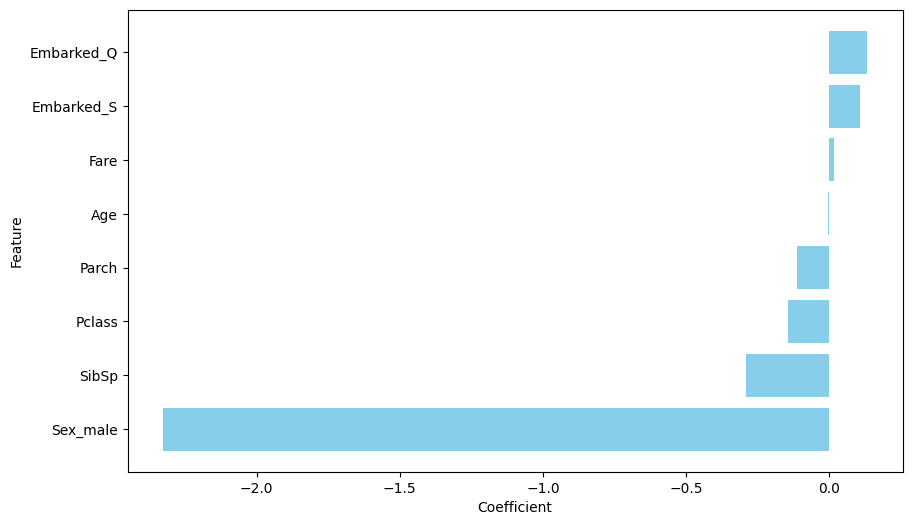

In [155]:
import matplotlib.pyplot as plt

# Extract coefficients from the model
coefficients = model.linear.weight.detach().numpy().flatten()
X = pd.DataFrame(X, columns=cleaned_data.columns[1:])
features = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)


##### Your code starts here #####

# Print the coefficients
print(coef_df)

# Plot the coefficients with a bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # display the highest coefficient on top
plt.show()

Does the result align with your intuition? Why or why not? According to your results, what is the biggest contributing factor of survival? (Answer in the markdown cell below)

It mostly aligns with my intuition. I assume passengers with higher social status(who paid more for fares and had higher classes) would have a slightly higher survival chance. And we all know that women and children were prioritized during evacuation. What surprises me is that age has only a minor effect on survival.

In my training set, the biggest factor contributing to survival was "Embarked"(which I don't quite understand), while being male strongly reduced the survival chance.

## Statement of Collaboration

It is mandatory to include a Statement of Collaboration in each submission, with respect to the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website.
For programming assignments, in particular, I encourage the students to organize (perhaps using Ed) to discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start working on it.

However, you should not discuss the specific solutions, and, as a guiding principle, you are not allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard, written notes, referring to Ed, etc.).

Especially after you have started working on the assignment, try to restrict the discussion to Ed as much as possible, so that there is no doubt as to the extent of your collaboration.

**Statement of Collaboration:** I completed this assignment independently and did not collaborate or discuss the work with anyone.

reference: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html